## This is the faster way to access the data remotely using NetCDF files

This method of accessint the data remotely from the THREDDS server is significantly faster than loading the data into local memory because only the data that are selected are loaded. This example is for calculating accumulated rain for one day.

In [1]:
import xarray as xr  # a toolset for reading netcdf files
from rain import *   # tool in this repo

# plot directly in notebook
%matplotlib inline   

Once we have these tools, we can load the dataset and inspect it

In [23]:
remote_data = xr.open_dataset('http://hydromet-thredds.princeton.edu/thredds/dodsC/UrbanRainfall/StLouis.nc')
print remote_data

<xarray.Dataset>
Dimensions:     (station: 101, time: 210336)
Coordinates:
    lat         (station) float64 ...
    lon         (station) float64 ...
  * time        (time) datetime64[ns] 2009-01-01 2009-01-01T00:15:00 ...
  * station     (station) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
Data variables:
    rain_gage   (station, time) float64 ...
    rain_radar  (station, time) float64 ...
Attributes:
    featureType: timeSeries
    Conventions: CF-1.6
    description: StLouis rain gage network
    history: Created 2016-02-17 20:04:22.691685


Select a time of interest and then aggregate over the time dimension. In this case I chose a known storm 

In [24]:
ds = remote_data.sel(time='2014-08-19').sum('time')
print ds

<xarray.Dataset>
Dimensions:     (station: 101)
Coordinates:
    lat         (station) float64 ...
    lon         (station) float64 ...
  * station     (station) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
Data variables:
    rain_gage   (station) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    rain_radar  (station) float64 0.39 0.68 0.56 0.7 0.75 0.63 0.45 0.53 ...


Move this xarray.Dataset object into a pandas.DataFrame for easy manipulation. And then move it from there to a rain.Event object.

In [25]:
df = ds.to_dataframe()
e = Event(df)

Use the Event.map_rain function to generate a map

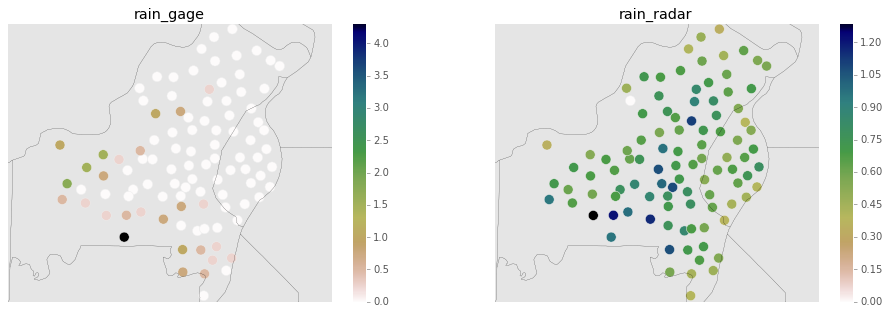

In [26]:
e.map_rain(basemap=True)

Use the Event.kride function to generate an interpolated map (this will take awhile)

[using ordinary kriging]


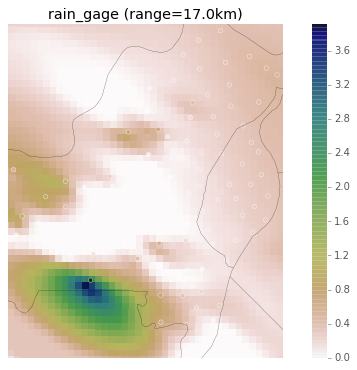

In [31]:
e.krige(basemap=True)